# Maternal Health Risk

https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set

Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join('datasets', 'Maternal Health Risk Data Set.csv')

df = pd.read_csv(file)

# Head and Tail

In [4]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
df.shape                                        

(1014, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


# Exploratory Data Analysis

In [7]:
# create age categories, 9-15 => children, 15-25 => youth, 25-65 => adults and > 65 yrs => seniors
df['AgeCat'] = pd.cut(df['Age'], [9, 15, 25, 65, np.inf], labels=['Children', 'Youth', 'Adults', 'Seniors'])
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeCat
0,25,130,80,15.0,98.0,86,high risk,Youth
1,35,140,90,13.0,98.0,70,high risk,Adults
2,29,90,70,8.0,100.0,80,high risk,Adults
3,30,140,85,7.0,98.0,70,high risk,Adults
4,35,120,60,6.1,98.0,76,low risk,Adults
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,Youth
1010,55,120,90,18.0,98.0,60,high risk,Adults
1011,35,85,60,19.0,98.0,86,high risk,Adults
1012,43,120,90,18.0,98.0,70,high risk,Adults


In [8]:
# create bar plot helper function
def plot_bar(df, x, y, xlabel=None, ylabel=None, title=None):

    # set plot theme and color codes
    sns.set_theme(style='whitegrid')
    sns.set_color_codes('pastel')

    # Initialize the matplotlib figure
    fig, ax = plt.subplots(figsize=(6, 4))

    # plot bar chart
    sns.barplot(
        x=x, y=y, data=df, ci=None
    )
    sns.despine(left=True, bottom=True)

    # matplotlib axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    return plot_bar

<function __main__.plot_bar(df, x, y, xlabel=None, ylabel=None, title=None)>

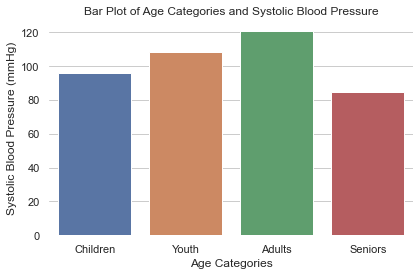

In [9]:
plot_bar(df=df, x='AgeCat', y='SystolicBP', 
         xlabel='Age Categories', ylabel='Systolic Blood Pressure (mmHg)', 
         title='Bar Plot of Age Categories and Systolic Blood Pressure')

<function __main__.plot_bar(df, x, y, xlabel=None, ylabel=None, title=None)>

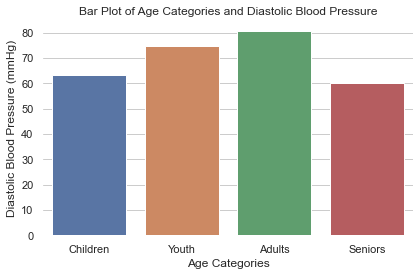

In [10]:
plot_bar(df=df, x='AgeCat', y='DiastolicBP', 
         xlabel='Age Categories', ylabel='Diastolic Blood Pressure (mmHg)', 
         title='Bar Plot of Age Categories and Diastolic Blood Pressure')

<function __main__.plot_bar(df, x, y, xlabel=None, ylabel=None, title=None)>

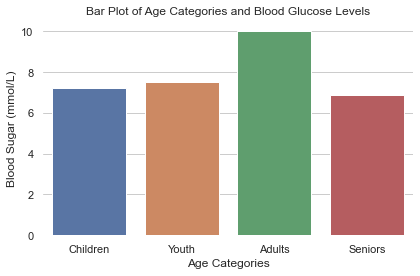

In [11]:
plot_bar(df=df, x='AgeCat', y='BS', 
         xlabel='Age Categories', ylabel='Blood Sugar (mmol/L)', 
         title='Bar Plot of Age Categories and Blood Glucose Levels')

<function __main__.plot_bar(df, x, y, xlabel=None, ylabel=None, title=None)>

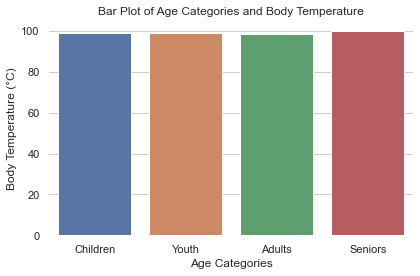

In [12]:
plot_bar(df=df, x='AgeCat', y='BodyTemp', 
         xlabel='Age Categories', ylabel='Body Temperature (°C)', 
         title='Bar Plot of Age Categories and Body Temperature')

<function __main__.plot_bar(df, x, y, xlabel=None, ylabel=None, title=None)>

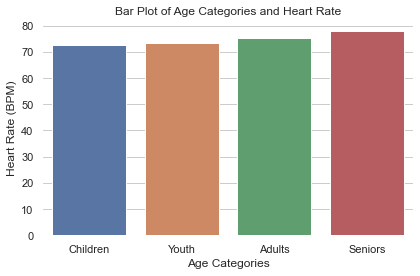

In [13]:
plot_bar(df=df, x='AgeCat', y='HeartRate', 
         xlabel='Age Categories', ylabel='Heart Rate (BPM)', 
         title='Bar Plot of Age Categories and Heart Rate')

In [14]:
df.describe()                                                   

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


# Correlation Coefficient

In [15]:
corr_matrix = df.corr()
corr_matrix

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


In [16]:
corr_matrix.shape

(6, 6)

<AxesSubplot:>

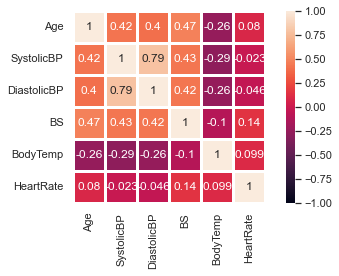

In [17]:
# plot a heatmap - absolute value(0-0.3; weak/no relationship, 0.3-0.7; moderate, > 0.7 strong correlation)
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True, linewidths=3)

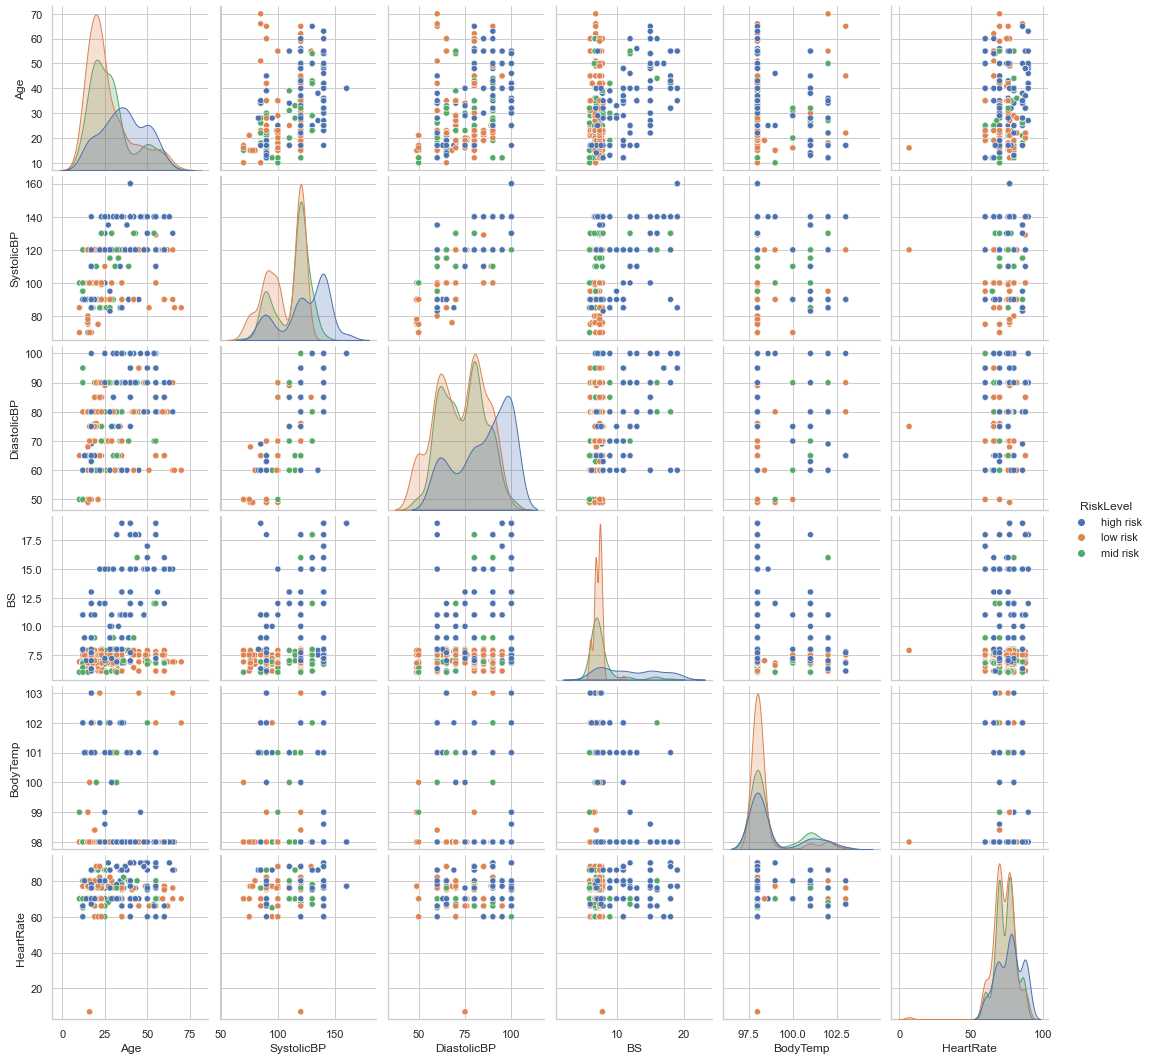

In [18]:
sns.pairplot(df, hue='RiskLevel')                            

# Missing Values Exploration

In [19]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
AgeCat         0
dtype: int64

# Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

X = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]                 # select features
y = df['RiskLevel']                                                                         # select target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Features dimension: {0} ==> Target dimensions: {1}'.format(X.shape, y.shape))
print('X train dimensions: {0} ==> y train dimensions: {1}'.format(X_train.shape, y_train.shape))
print('X test dimensions: {0} ==> y test dimensions: {1}'.format(X_test.shape, y_test.shape))

Features dimension: (1014, 6) ==> Target dimensions: (1014,)
X train dimensions: (811, 6) ==> y train dimensions: (811,)
X test dimensions: (203, 6) ==> y test dimensions: (203,)


# Pipeline

Linear Support Vector Classifier

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


# create a data transformation and model fitting pipeline
pipe = Pipeline([
    ('qt', QuantileTransformer()), ('lsvc', LinearSVC(random_state=42))
])

# implement a grid search cross-validation
estimator=pipe
param_grid = {
    'lsvc__C': np.logspace(0.1, 1, 100)
    }
scoring = 'accuracy'

lsvc_gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, n_jobs=-1, cv=3, refit=False)
lsvc_gscv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('qt', QuantileTransformer()),
                                       ('lsvc', LinearSVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'lsvc__C': array([ 1.25892541,  1.28555573,  1.31274937,  1.34051824,  1.36887451,
        1.39783061,  1.42739922,  1.4575933 ,  1.48842609,  1.51991108,
        1.55206209,  1.58489319,  1.61841878,  1.65265354,  1.68761248,
        1.72331091,  1.75976447,  1.79698915,  1.8...
        5.44958758,  5.56486388,  5.68257864,  5.80278345,  5.92553098,
        6.05087501,  6.17887047,  6.30957344,  6.44304121,  6.57933225,
        6.71850628,  6.86062429,  7.00574855,  7.15394265,  7.30527154,
        7.45980152,  7.61760031,  7.77873705,  7.94328235,  8.11130831,
        8.28288856,  8.45809828,  8.63701425,  8.81971488,  9.0062802 ,
        9.19679199,  9.3913337 ,  9.58999061,  9.79284974, 10.        ])},
             refit=False, scoring='accuracy')

In [22]:
# helper function to display best parameter and best score
def display_scores(gscv_results):
    print(f'Best parameter: {gscv_results.best_params_}')
    print(f'Best score: {gscv_results.best_score_}')

In [23]:
display_scores(lsvc_gscv)

Best parameter: {'lsvc__C': 9.792849742266025}
Best score: 0.6534782014486811


In [24]:
lsvc_gscv_df = pd.DataFrame(lsvc_gscv.cv_results_)
lsvc_gscv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lsvc__C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033135,0.004991,0.010040,1.123916e-07,1.258925,{'lsvc__C': 1.2589254117941673},0.682657,0.651852,0.618519,0.651009,0.026191,2
1,0.032635,0.002039,0.010034,5.564235e-06,1.285556,{'lsvc__C': 1.2855557319139024},0.682657,0.651852,0.618519,0.651009,0.026191,2
2,0.029456,0.000939,0.014057,2.950109e-03,1.312749,{'lsvc__C': 1.312749368925199},0.682657,0.651852,0.618519,0.651009,0.026191,2
3,0.028511,0.002564,0.010385,2.057769e-03,1.340518,{'lsvc__C': 1.3405182387914738},0.682657,0.651852,0.618519,0.651009,0.026191,2
4,0.030825,0.000926,0.011876,1.438477e-03,1.368875,{'lsvc__C': 1.368874509537081},0.682657,0.651852,0.618519,0.651009,0.026191,2


# Plot LSVC Cross Validation Results

In [25]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def percentage(x, pos):
    'The two args are the value and tick position'
    return '%1.2f'% (x * 100)

formatter = FuncFormatter(percentage)


# helper function for plotting grid search cross validation results
def plot_cvresults(x, y, xlabel=None, ylabel=None, title=None, color=None, marker=None, linestyle=None, linewidth=None, markersize=None):
    
    # create matplotlib fig
    fig, ax = plt.subplots()

    # x-axis and y-axis
    ax.plot(x, y, color=color, marker=marker, linestyle=linestyle, linewidth=linewidth, markersize=markersize)

    # set label plot
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis format to 2.dp
    ax.yaxis.set_major_formatter(percentage)
    
    return plot_cvresults

<function __main__.plot_cvresults(x, y, xlabel=None, ylabel=None, title=None, color=None, marker=None, linestyle=None, linewidth=None, markersize=None)>

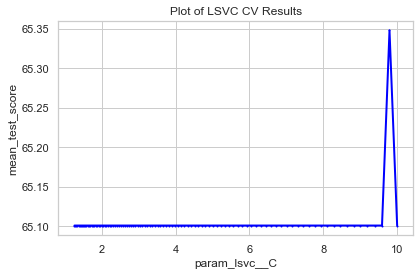

In [26]:
plot_cvresults(
    x=lsvc_gscv_df['param_lsvc__C'], y=lsvc_gscv_df['mean_test_score'],
    xlabel='param_lsvc__C', ylabel='mean_test_score', title='Plot of LSVC CV Results',
    color='blue', marker='.', linestyle='-', linewidth=2, markersize=2

)

KNeighbors Classifier

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


# create a data transformation and model fitting pipeline
pipe = Pipeline([
    ('qt', QuantileTransformer()), ('knnC', KNeighborsClassifier())
])

# implement a grid search cross-validation
estimator=pipe
param_grid = {
    'knnC__n_neighbors': np.arange(2, 6)
    }
scoring = 'accuracy'

KnnC_gscv = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring=scoring, n_jobs=-1, cv=3, refit=False)
KnnC_gscv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('qt', QuantileTransformer()),
                                       ('knnC', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'knnC__n_neighbors': array([2, 3, 4, 5])},
             refit=False, scoring='accuracy')

In [28]:
display_scores(KnnC_gscv)

Best parameter: {'knnC__n_neighbors': 2}
Best score: 0.716391052799417


In [29]:
KnnC_gscv_df = pd.DataFrame(KnnC_gscv.cv_results_)
KnnC_gscv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knnC__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013324,0.003769,0.024078,0.006544,2,{'knnC__n_neighbors': 2},0.723247,0.722222,0.703704,0.716391,0.008981,1
1,0.007996,0.000001,0.021659,0.003973,3,{'knnC__n_neighbors': 3},0.697417,0.722222,0.655556,0.691732,0.027512,2
2,0.016014,0.000030,0.019231,0.003968,4,{'knnC__n_neighbors': 4},0.690037,0.662963,0.633333,0.662111,0.023157,4
3,0.015726,0.000466,0.014435,0.003304,5,{'knnC__n_neighbors': 5},0.675277,0.725926,0.659259,0.686821,0.028414,3


<function __main__.plot_cvresults(x, y, xlabel=None, ylabel=None, title=None, color=None, marker=None, linestyle=None, linewidth=None, markersize=None)>

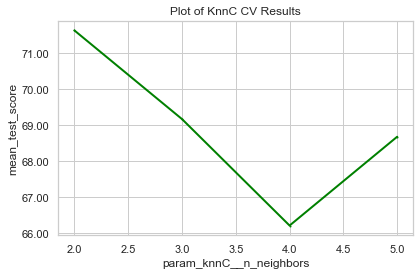

In [30]:
plot_cvresults(
    x=KnnC_gscv_df['param_knnC__n_neighbors'], y=KnnC_gscv_df['mean_test_score'],
    xlabel='param_knnC__n_neighbors', ylabel='mean_test_score', title='Plot of KnnC CV Results',
    color='green', marker='.', linestyle='-', linewidth=2, markersize=2

)